In [187]:
import pandas as pd
from scipy.stats import kstest
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


<h2>Bootstrap for KS Test

In [188]:
data = pd.read_csv('data/train.csv')
bootstrap_samples = [data.sample(frac=0.4, replace=True) for _ in range(10000)]

p_values = []
for sample in bootstrap_samples:
    price_logged = np.log(sample['SalePrice'])
    y = (price_logged - price_logged.mean()) / price_logged.std()
    # Perform K-S test
    p = kstest(y, stats.norm.cdf).pvalue
    p_values.append(p)

print('min: ', min(p_values))
print('max: ', max(p_values))
print('mean: ', np.mean(p_values))
print('percent of ps below 0.05: ', len([p for p in p_values if p < 0.05]) / len(p_values))

min:  0.00010790536278176316
max:  0.918760794360968
mean:  0.15301366535211303
percent of ps below 0.05:  0.2431


In [189]:

bootstrap_samples = [data.sample(frac=0.2, replace=True) for _ in range(10000)]

<h2>QQ Plot

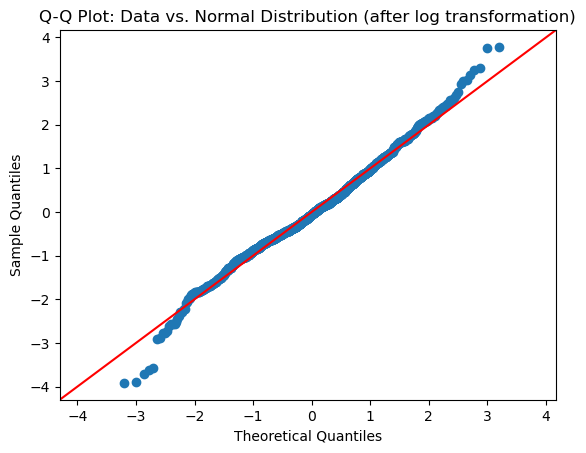

In [193]:
# Suppose y is your data array, e.g. y = np.log(data['SalePrice'])
y = np.log(data['SalePrice'])
#y = data['SalePrice']
y = (y - np.mean(y)) / np.std(y)

# Create a Q-Q plot comparing y to a normal distribution
fig = qqplot(y, line='45')
plt.title('Q-Q Plot: Data vs. Normal Distribution (after log transformation)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()
